In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

In [2]:
print(tf.__version__)

2.12.0


# MNIST DATA

In [3]:
mnist = keras.datasets.mnist

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


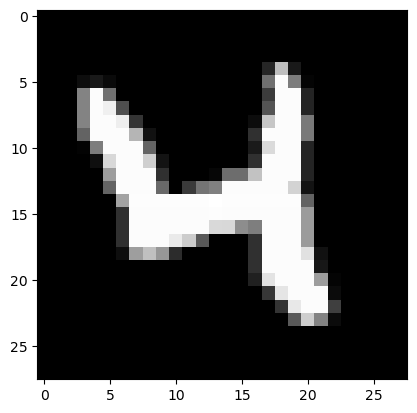

4


In [14]:
index = 20
plt.imshow(X_train[index], cmap="gray")
plt.show()
print(y_train[index])

In [15]:
class_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
class_names

['Zero',
 'One',
 'Two',
 'Three',
 'Four',
 'Five',
 'Six',
 'Seven',
 'Eight',
 'Nine']

# Data Preparation

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
y_test.shape

(10000, 10)

# CNN

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(6, (3,3), input_shape=(28,28,1), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(10, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(60, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [29]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 10)        550       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 250)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
model.fit(X_train, y_train, epochs = 20, batch_size = 1000, verbose = True, validation_data = (X_test, y_test))

Epoch 1/20
60/60 [==============================] - 2s 28ms/step - loss: 5.9148 - accuracy: 0.4682 - val_loss: 0.8304 - val_accuracy: 0.7455
Epoch 2/20
60/60 [==============================] - 2s 26ms/step - loss: 0.6198 - accuracy: 0.8122 - val_loss: 0.4550 - val_accuracy: 0.8617
Epoch 3/20
60/60 [==============================] - 2s 26ms/step - loss: 0.3908 - accuracy: 0.8850 - val_loss: 0.3078 - val_accuracy: 0.9088
Epoch 4/20
60/60 [==============================] - 2s 26ms/step - loss: 0.2837 - accuracy: 0.9166 - val_loss: 0.2369 - val_accuracy: 0.9310
Epoch 5/20
60/60 [==============================] - 2s 27ms/step - loss: 0.2218 - accuracy: 0.9341 - val_loss: 0.1919 - val_accuracy: 0.9430
Epoch 6/20
60/60 [==============================] - 2s 27ms/step - loss: 0.1809 - accuracy: 0.9459 - val_loss: 0.1604 - val_accuracy: 0.9538
Epoch 7/20
60/60 [==============================] - 2s 26ms/step - loss: 0.1535 - accuracy: 0.9543 - val_loss: 0.1502 - val_accuracy: 0.9548
Epoch 8/20
60

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9757


In [35]:
predictions = model.predict(X_test)
print("prediction array", predictions[0])
print("number with highest confidence", np.argmax(predictions[0]))
print("actual value", y_test[0])

313/313 [==============================] - 0s 1ms/step
prediction array [2.7508334e-11 1.2154935e-08 3.6914823e-08 1.1667458e-06 1.3170183e-10
 1.3356072e-09 8.0616297e-16 9.9999619e-01 1.2162883e-09 2.6528319e-06]
number with highest confidence 7
actual value [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
